In [26]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


base_dir = '/content/drive/MyDrive/Gender'
men_dir = os.path.join(base_dir, 'MEN')
women_dir = os.path.join(base_dir, 'WOMAN')

In [27]:
# Función de carga de imagenes
def load_images_and_labels(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 128))
            images.append(img)
            labels.append(label)
    return images, labels

# Carga de imagenes
men_images, men_labels = load_images_and_labels(men_dir, 0)
women_images, women_labels = load_images_and_labels(women_dir, 1)

In [28]:
#Combinación de datos
images = men_images + women_images
labels = men_labels + women_labels

# Conversión a arrays numpy
images = np.array(images)
labels = np.array(labels)

In [29]:
print(f"Total images: {len(images)}")
print(f"Total labels: {len(labels)}")

Total images: 1092
Total labels: 1092


In [30]:
from keras.utils import to_categorical
# Preporcesamiento de datos

images = images / 255.0 # Normalización
labels = to_categorical(labels, num_classes=2) # One-hot labels

In [31]:
# Prueba y entrenamiento
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#Construcción del modelo de clasificación
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 64)       

In [33]:
#Compilación del modelo
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [34]:
#Entrenamiento
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
28/28 [==============================] - 40s 1s/step - loss: 0.8752 - accuracy: 0.4903 - val_loss: 0.6923 - val_accuracy: 0.6027
Epoch 2/10
28/28 [==============================] - 35s 1s/step - loss: 0.6913 - accuracy: 0.5418 - val_loss: 0.6851 - val_accuracy: 0.6210
Epoch 3/10
28/28 [==============================] - 35s 1s/step - loss: 0.6539 - accuracy: 0.6140 - val_loss: 0.6574 - val_accuracy: 0.5708
Epoch 4/10
28/28 [==============================] - 36s 1s/step - loss: 0.6184 - accuracy: 0.6438 - val_loss: 0.6508 - val_accuracy: 0.6712
Epoch 5/10
28/28 [==============================] - 35s 1s/step - loss: 0.5732 - accuracy: 0.7033 - val_loss: 0.5780 - val_accuracy: 0.7260
Epoch 6/10
28/28 [==============================] - 35s 1s/step - loss: 0.5184 - accuracy: 0.7434 - val_loss: 0.5929 - val_accuracy: 0.6804
Epoch 7/10
28/28 [==============================] - 36s 1s/step - loss: 0.5077 - accuracy: 0.7503 - val_loss: 0.5731 - val_accuracy: 0.7123
Epoch 8/10
28/28 [==

In [35]:
#Evalución del modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(X_train, y_train)
print("Loss training:", loss)
print("Accuracy training:", accuracy)

#Evaluación con datos no vistos
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss test:", loss)
print("Accuracy test:", accuracy)

28/28 [==============================] - 6s 212ms/step - loss: 0.3052 - accuracy: 0.8797
Loss training: 0.30523794889450073
Accuracy training: 0.8797250986099243
7/7 [==============================] - 3s 369ms/step - loss: 0.6460 - accuracy: 0.6941
Loss test: 0.6459936499595642
Accuracy test: 0.6940639019012451


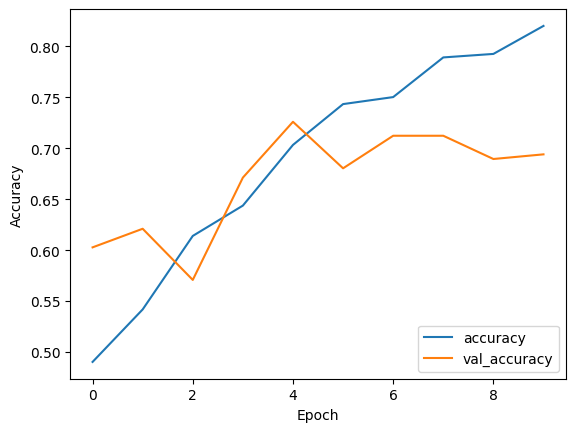

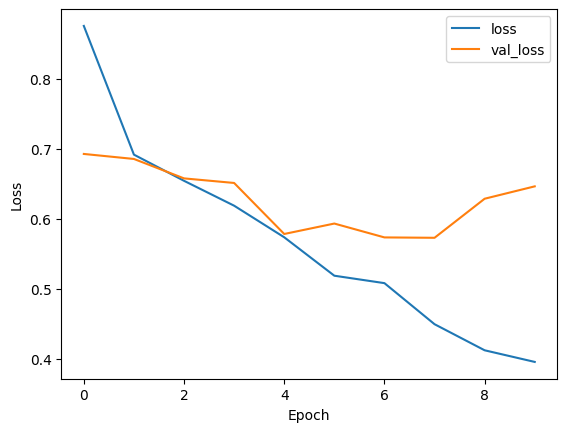

In [36]:
# Plot training history
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [37]:
# Classification report and confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

7/7 [==============================] - 2s 213ms/step


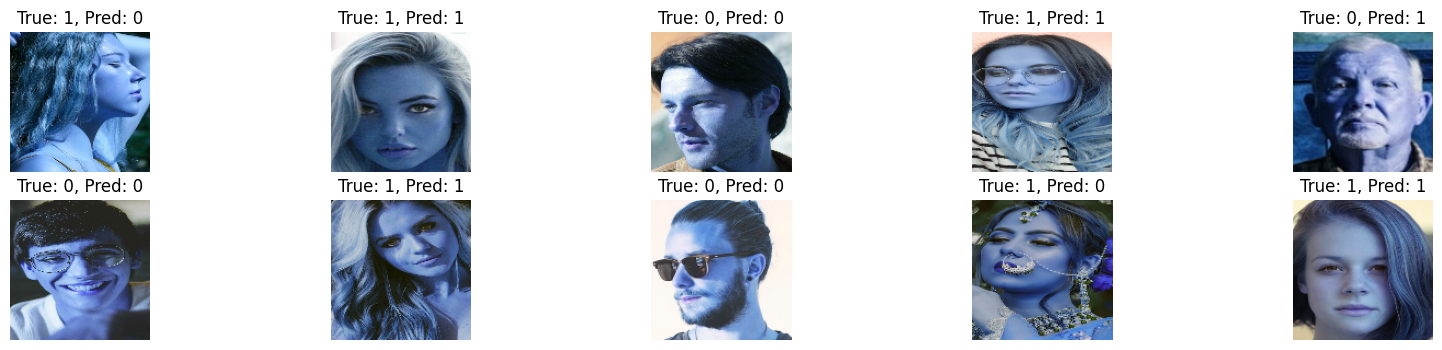

In [38]:
# Show 10 sample predictions
def plot_sample_predictions(X, y_true, y_pred, num_samples=10):
    indices = np.random.choice(range(len(X)), num_samples, replace=False)
    plt.figure(figsize=(20, 4))
    for i, idx in enumerate(indices):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(X[idx])
        plt.title(f"True: {np.argmax(y_true[idx])}, Pred: {np.argmax(y_pred[idx])}")
        plt.axis('off')
    plt.show()

plot_sample_predictions(X_test, y_test, y_pred)